Ejercicio 2.2


In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import timeit

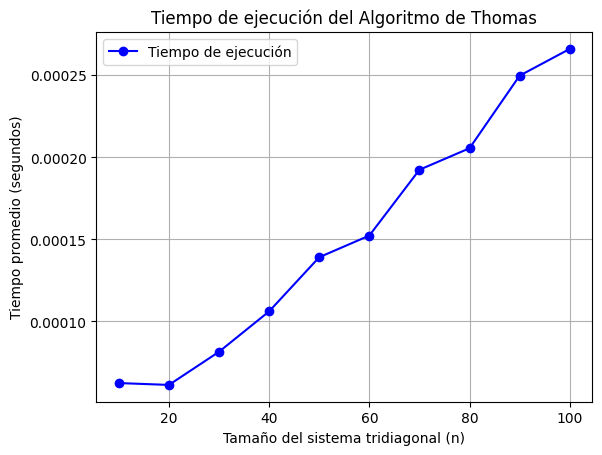

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [2]:
# Función de Thomas para resolver sistemas tridiagonales
def Thomas(DP, DS, DI, b):
    n=len(DP)
    x=np.zeros(n)
    """
    Resuelve un sistema tridiagonal de ecuaciones lineales usando el algoritmo de Thomas.

    Parámetros:
    DP (array-like): La diagonal principal del sistema (vector de tamaño n).
    DS (array-like): La diagonal superior del sistema (vector de tamaño n-1).
    DI (array-like): La diagonal inferior del sistema (vector de tamaño n-1).
    b (array-like): El vector de términos independientes del sistema (vector de tamaño n).

    Retorna:
    x (ndarray): El vector solución del sistema tridiagonal.

    El algoritmo de Thomas es un caso específico del método de eliminación de Gauss que se utiliza para resolver
    sistemas de ecuaciones lineales con matrices tridiagonales. Este algoritmo es eficiente en términos de tiempo,
    ya que tiene una complejidad de O(n), donde n es el número de ecuaciones en el sistema.

    El proceso se divide en dos fases:
    1. **Eliminación progresiva**: Modifica los coeficientes del sistema de manera que, en cada paso, se eliminen
       las variables correspondientes a las subdiagonales y superdiagonales.
    2. **Sustitución regresiva**: Resuelve las ecuaciones resultantes de abajo hacia arriba para obtener las
       soluciones del sistema.
    """

    for i in range(1,n):
      DP[i]=DP[i]-(DI[i-1]/DP[i-1])*DS[i-1]


    x[-1]=b[-1]/DP[-1]

    for i in range(n-2,-1,-1):
      x[i]=(b[i]-DS[i]*x[i+1])/DP[i]
    return x

# Lista de tamaños y tiempos
tamaños = list(range(10, 101, 10))  # De 10 a 100 en pasos de 10
tiempos = []

# Medir tiempos de ejecución para diferentes tamaños de sistemas tridiagonales
for n in tamaños:
    # Crear la diagonal principal
    DP=2*np.ones(n)
    diagonal_principal = np.diag(DP)

    # Crear la diagonal superior
    DS=-np.ones(n-1)
    diagonal_superior = np.diag(DS, k=1)
    # Crear la diagonal inferior
    DI=-np.ones(n-1)
    diagonal_inferior = np.diag(DI, k=-1)
    b=np.ones(n) # Términos independientes

    tiempo = timeit.timeit(lambda: Thomas(DP, DS, DI, b), number=1)  # 1 ejecucion
    tiempos.append(tiempo)

# Graficar los resultados
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño del sistema tridiagonal (n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución del Algoritmo de Thomas")
plt.legend()
plt.grid()
plt.show()
print(tamaños)

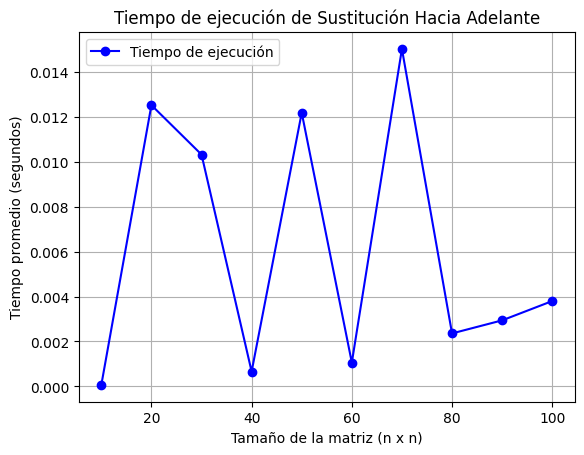

In [3]:
def SustitucionDelante(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]

    return x

# Lista de tamaños y tiempos
tamaños = list(range(10, 101, 10))  # De 10x10 hasta 100x100 en pasos de 10
tiempos = []

# Medir tiempos de ejecución para diferentes tamaños de matrices
for n in tamaños:
    Mat = np.tril(np.random.rand(n, n) + 1)  # Matriz triangular inferior con valores >= 1 en la diagonal
    b = np.random.rand(n)  # Vector de términos independientes

    tiempo = timeit.timeit(lambda: SustitucionDelante(Mat, b), number=1)  # 10 ejecucion
    tiempos.append(tiempo)

# Graficar los resultados
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución de Sustitución Hacia Adelante")
plt.legend()
plt.grid()
plt.show()

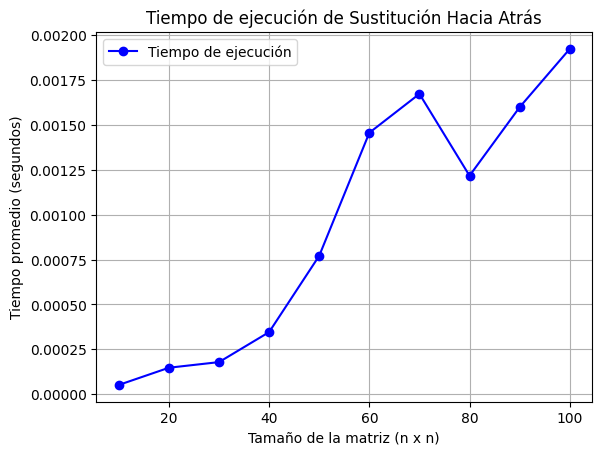

In [4]:
def SustitucionAtras(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):  # Recorrido de atrás hacia adelante
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]  # División por el pivote

    return x

# Lista de tamaños y tiempos
tamaños = list(range(10, 101, 10))  # Tamaños de 10x10 hasta 100x100 en pasos de 10
tiempos = []

# Medir tiempos de ejecución para diferentes tamaños de matrices
for n in tamaños:
    Mat = np.triu(np.random.rand(n, n) + 1)  # Matriz triangular superior con valores >= 1 en la diagonal
    b = np.random.rand(n)  # Vector de términos independientes

    tiempo = timeit.timeit(lambda: SustitucionAtras(Mat, b), number=1)  # 1 ejecucion
    tiempos.append(tiempo)

# Graficar los resultados
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución de Sustitución Hacia Atrás")
plt.legend()
plt.grid()
plt.show()

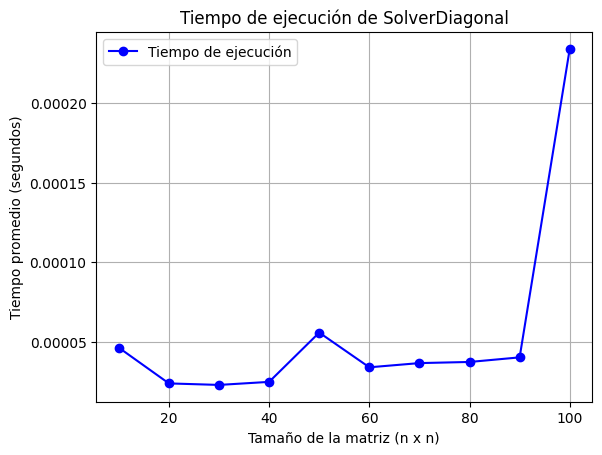

In [5]:
def SolverDiagonal(A, b):
    n = len(A)
    x = np.zeros_like(A, dtype=float)  # Asegura que x sea de tipo flotante
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

# Lista de tamaños y tiempos
tamaños = list(range(10, 101, 10))  # Tamaños de 10x10 hasta 100x100 en pasos de 10
tiempos = []

# Medir tiempos de ejecución para diferentes tamaños de matrices diagonales
for n in tamaños:
    A = np.random.rand(n) + 1  # Matriz diagonal como un vector (evita ceros en la diagonal)
    b = np.random.rand(n)  # Vector de términos independientes

    tiempo = timeit.timeit(lambda: SolverDiagonal(A, b), number=1)  # 1 ejecucion
    tiempos.append(tiempo)

# Graficar los resultados
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución de SolverDiagonal")
plt.legend()
plt.grid()
plt.show()

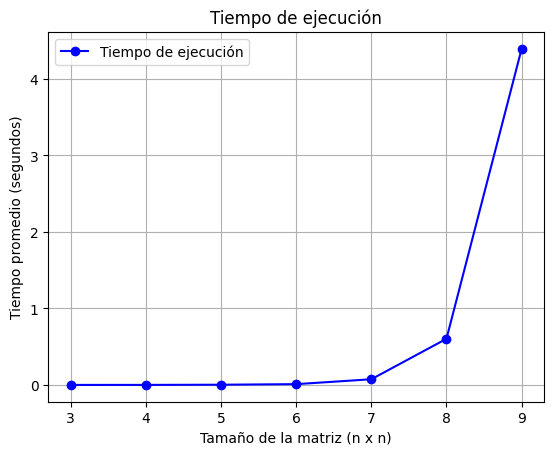

In [6]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import timeit

def SubMat(Mat, ren, col):

    # Crear una copia de la matriz original para no modificarla
    M1 = np.copy(Mat)

    # Eliminar el renglón especificado
    M1 = np.delete(M1, ren, axis=0)

    # Eliminar la columna especificada
    M1 = np.delete(M1, col, axis=1)

    return M1

def Det(Mat):

    # Caso base: matriz 2x2
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])

    # Caso recursivo: matrices más grandes
    deter = 0.0
    for col in range(Mat.shape[0]):
        # Calcula el cofactor y suma al determinante
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter


tamaños = list(range(3, 10))  # De 10x10 hasta 100x100 en pasos de 10
tiempos = []

for n in tamaños:
    Mat = np.random.rand(n, n)  # Matriz aleatoria de tamaño n x n

    tiempo = timeit.timeit(lambda: Det(Mat), number=1)  # 1 ejecucion
    tiempos.append(tiempo)

# Graficar
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución")
plt.legend()
plt.grid()
plt.show()

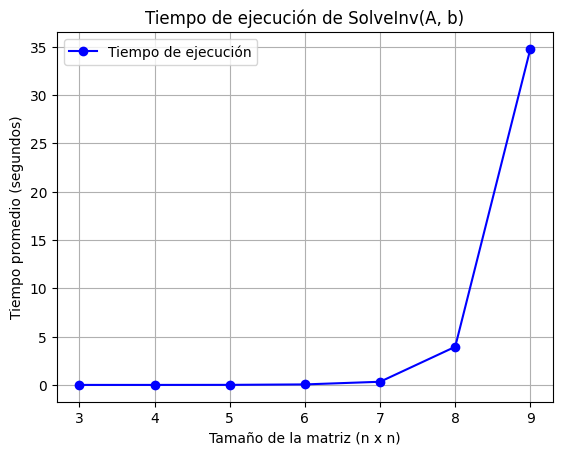

In [7]:
def Cofactores(Mat):
  # Crear una matriz de ceros del mismo tamaño que Mat para almacenar los cofactores
    Cofa = np.zeros_like(Mat, dtype=float)

    # Calcular el cofactor para cada elemento de la matriz
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            # Calcular el determinante de la submatriz (menor) y aplicar el signo
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa

def Transpuesta(Mat):
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                # Intercambia los elementos para obtener la transpuesta
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat

def Inv(Mat):
   # Calcular el determinante de la matriz
    deter = Det(Mat)

    # Verificar si la matriz es singular (determinante = 0)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    # Calcular la matriz de cofactores
    Cofac = Cofactores(Mat)

    # Transponer la matriz de cofactores para obtener la matriz adjunta
    Cofac = Transpuesta(Cofac)

    # Calcular la inversa multiplicando la adjunta por 1/determinante
    Inversa = (1 / deter) * Cofac

    return Inversa

# Función dada para resolver el sistema usando la inversa
def SolveInv(Mat, vec):
    InvMat = Inv(Mat) # Calcula la inversa
    Solucion = InvMat @ vec      # Multiplica la inversa por el vector
    return Solucion

# Lista de tamaños de matrices y tiempos
tamaños = list(range(3, 10))  # Tamaños de 10x10 hasta 100x100
tiempos = []

# Medir tiempos de ejecución para diferentes tamaños de matrices
for n in tamaños:
    Mat = np.random.rand(n, n)  # Matriz aleatoria de tamaño n x n
    vec = np.random.rand(n)     # Vector aleatorio de tamaño n

    # Medir tiempo de ejecución
    tiempo = timeit.timeit(lambda: SolveInv(Mat,vec), number=1)
    tiempos.append(tiempo)

# Graficar los resultados
plt.plot(tamaños, tiempos, marker='o', linestyle='-', color='b', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la matriz (n x n)")
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Tiempo de ejecución de SolveInv(A, b)")
plt.legend()
plt.grid()
plt.show()